In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import wrangle_zillow as w
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



### Clustering with the Iris Dataset
### 
### Using this lesson as a guide, perform clustering on the iris dataset.
### 


In [25]:
reload(w)
df = sns.load_dataset('iris')
train,validate,test = w.tvt_split(df)
train.species.value_counts()

versicolor    31
setosa        29
virginica     24
Name: species, dtype: int64

### Choose features other than the ones used in the lesson.


In [27]:
features = train[['petal_length','petal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
train['cluster'] = kmeans.predict(features)


### Visualize the results of your clustering.


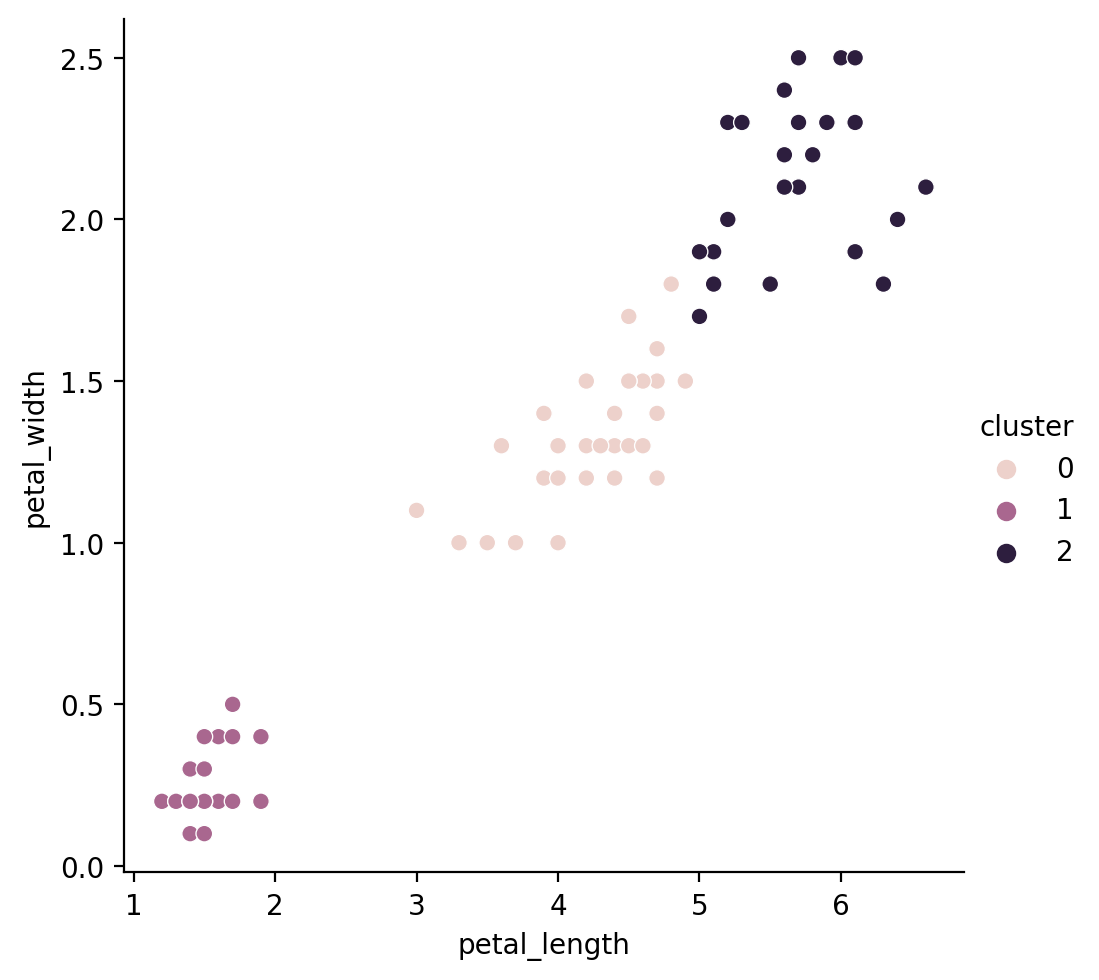

In [28]:
sns.relplot(data=train,x='petal_length',y='petal_width',hue='cluster')
plt.show()

### Use the elbow method to visually select a good value for k.


<AxesSubplot:>

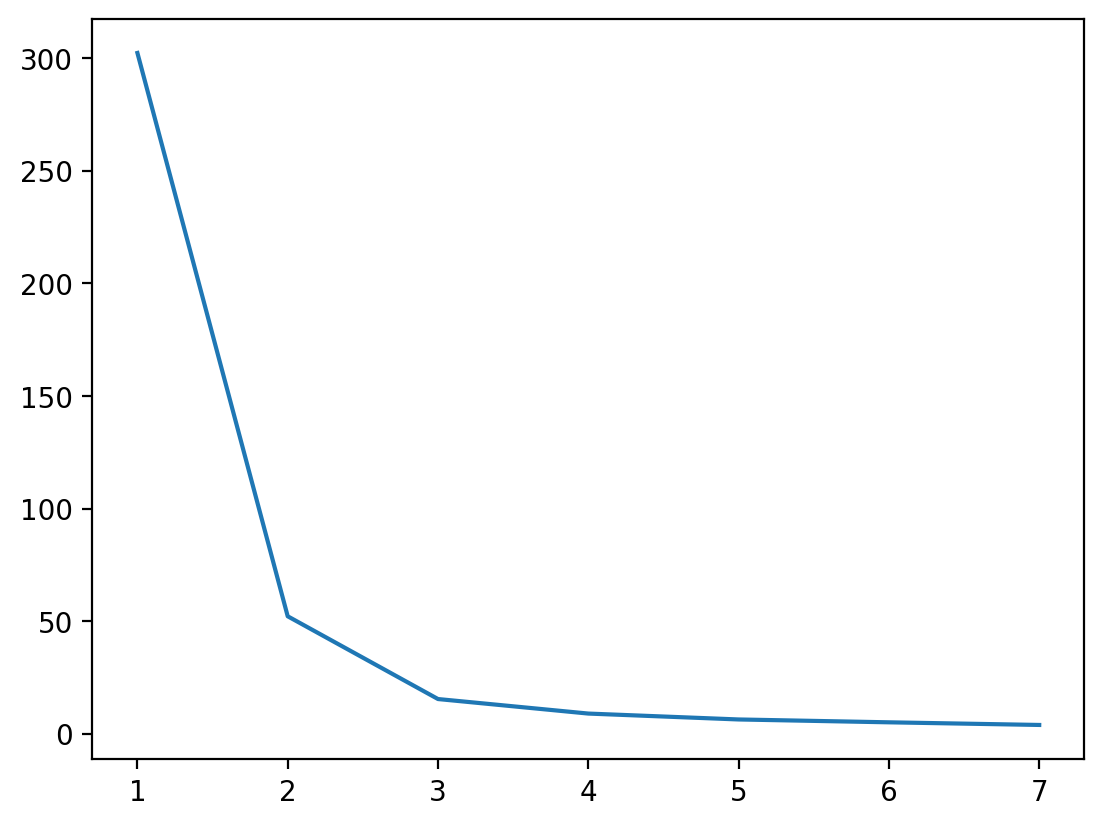

In [35]:
inertia = pd.Series({i:KMeans(i).fit(features).inertia_ for i in range(1,8)})
sns.lineplot(data=inertia)

### Repeat the clustering, this time with 3 different features.


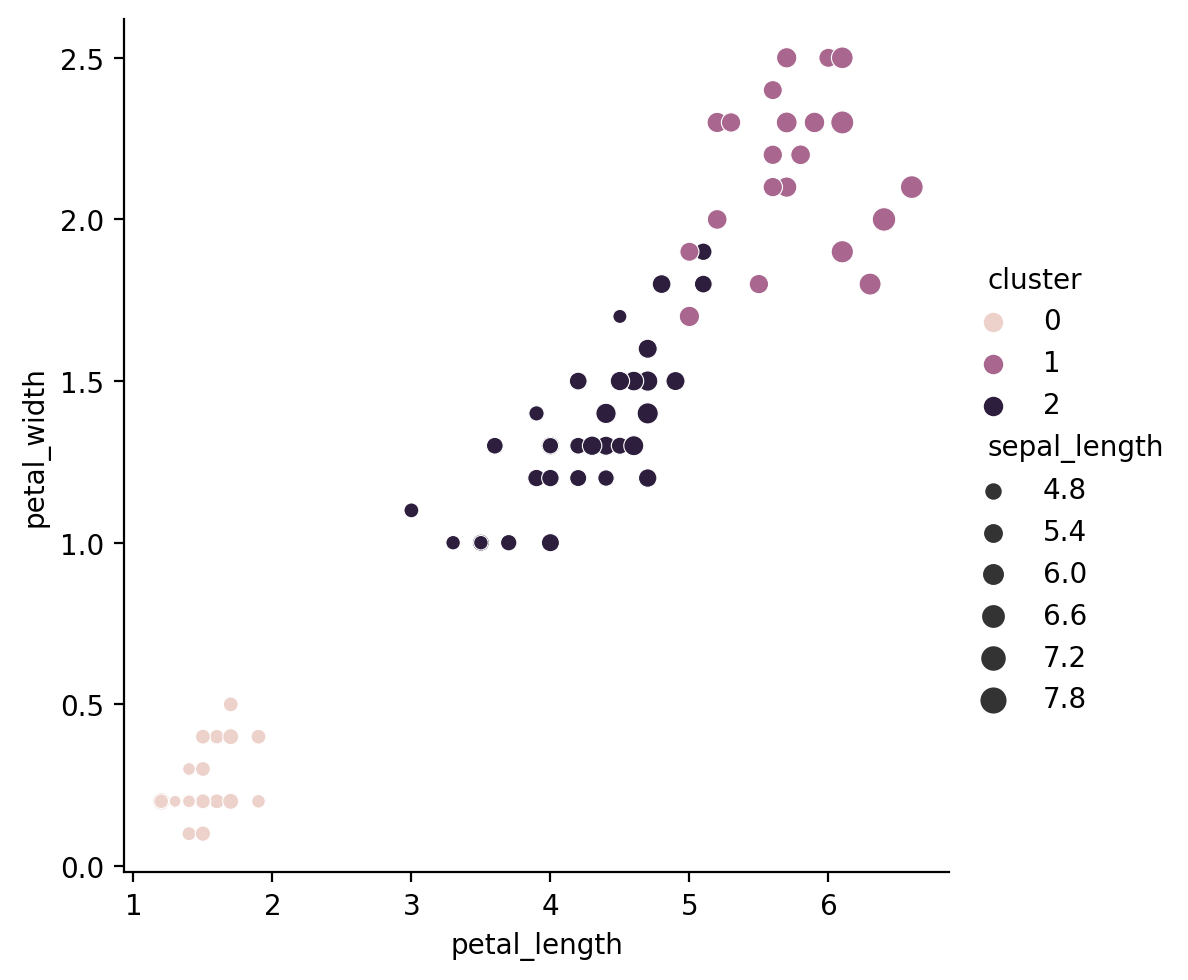

In [36]:
features = train[['petal_length','petal_width','sepal_length']]
kmeans = KMeans(3)
kmeans.fit(features)
train.cluster = kmeans.predict(features)
sns.relplot(data=train, x='petal_length',y='petal_width',size='sepal_length',hue='cluster')

### Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!
### 
### How does scaling impact the results of clustering?
### 
### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.